In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import plotly.express as px

# Set dark mode for plotting
plt.style.use('dark_background')
px.defaults.template = "plotly_dark"

# TensorFlow info
print("TensorFlow Version:", tf.__version__)


TensorFlow Version: 2.9.1


In [2]:
import tensorflow as tf
from tensorflow.python.client import device_lib

print("TensorFlow version:", tf.__version__)
print("Physical GPUs:", tf.config.list_physical_devices('GPU'))
print("All devices:", [x.name for x in device_lib.list_local_devices()])


TensorFlow version: 2.9.1
Physical GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
All devices: ['/device:CPU:0', '/device:GPU:0']


In [5]:
model_name = 'capModeL' 

In [6]:
#loading model only for test
model = tf.keras.models.load_model(f'{model_name}.h5', compile=False)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 9)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 256)          2560        ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 128)          32896       ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 64)           8256        ['dense_1[0][0]']                
                                                                                              

In [5]:
df = pd.read_csv('training_Vessel_data.csv')
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())
tf.config.list_physical_devices()

['/device:CPU:0', '/device:GPU:0']


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
#adding GPU support
physical_devices = tf.config.list_physical_devices('GPU')
physical_devices

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [7]:
import pandas as pd

def zscore_normalize(df):
  # create a copy of the dataframe
  df_normalized = df.copy()
  # loop over each column
  for column in df_normalized.columns:
    # calculate the mean and standard deviation of the column
    mean = df_normalized[column].mean()
    std = df_normalized[column].std()
    # subtract the mean and divide by the standard deviation
    df_normalized[column] = (df_normalized[column] - mean) / std
  # return the normalized dataframe
  return df_normalized

df = zscore_normalize(df)
df.describe()

,Speed,G-Force,Altitude (Sea Level),Altitude (Ground),Pressure,Mass,Thrust,atmospheric_density,Position1,Position2,...,Lift1,Lift2,Lift3,Orientation1,Orientation2,Orientation3,Angular Velocity1,Angular Velocity2,Angular Velocity3,Time
count,1.177100e+04,1.177100e+04,1.177100e+04,1.177100e+04,1.177100e+04,1.177100e+04,1.177100e+04,1.177100e+04,1.177100e+04,1.177100e+04,...,1.177100e+04,1.177100e+04,1.177100e+04,1.177100e+04,1.177100e+04,1.177100e+04,1.177100e+04,1.177100e+04,1.177100e+04,1.177100e+04
mean,1.448732e-16,-2.173098e-17,5.794928e-17,4.829107e-17,4.829107e-17,2.076516e-16,8.692393e-17,7.243661e-18,-3.380375e-17,5.794928e-17,...,2.414554e-18,1.328004e-17,-9.658214e-18,-5.312018e-17,-7.726571e-17,-1.931643e-17,3.621830e-18,-9.658214e-18,-1.207277e-18,1.062404e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.214937e+00,-3.058662e-01,-1.371349e+00,-1.365645e+00,-3.666172e-01,-3.662593e+00,-2.817389e-01,-3.828765e-01,-2.396485e+00,-2.442672e+00,...,-3.017621e+01,-1.564939e+01,-1.142693e+00,-3.340506e+00,-2.346355e+00,-2.018410e+00,-7.029834e-01,-3.427629e+01,-3.429261e+01,-1.515680e+00
25%,-4.290002e-01,-3.057653e-01,-8.408653e-01,-8.444966e-01,-3.666172e-01,-1.852376e-01,-2.817389e-01,-3.828765e-01,-4.326808e-01,-1.406658e-01,...,7.579834e-02,-4.934357e-02,-7.865173e-02,-5.992973e-01,-8.687593e-01,-8.525903e-01,-3.090349e-02,2.690214e-02,2.898013e-02,-8.632950e-01
50%,1.012342e-01,-3.057035e-01,-2.238583e-02,-2.245889e-02,-3.666172e-01,-1.852376e-01,-2.817389e-01,-3.828765e-01,-2.201871e-01,-1.198823e-01,...,7.579834e-02,-4.934357e-02,-7.865156e-02,1.143471e-01,3.088933e-03,-1.501046e-01,-3.078359e-02,3.012224e-02,2.899553e-02,-1.131957e-01
75%,7.060107e-01,-3.017168e-01,5.807624e-01,5.791531e-01,-3.611275e-01,-1.852376e-01,-2.817389e-01,-3.769848e-01,7.548405e-01,4.456432e-01,...,7.579834e-02,-4.934357e-02,-7.865156e-02,7.910016e-01,8.817373e-01,1.052541e+00,-2.629193e-02,3.247535e-02,2.944570e-02,7.633571e-01
max,1.759666e+00,6.289609e+00,2.728619e+00,2.726524e+00,4.048050e+00,5.568720e+00,3.790797e+00,4.181584e+00,2.066715e+00,2.330457e+00,...,2.126295e+00,1.506589e+01,2.885012e+01,1.573321e+00,2.150270e+00,1.707334e+00,3.426934e+01,8.486506e-01,9.922022e-02,2.533706e+00


In [8]:
df.columns


Index(['Speed', 'G-Force', 'Altitude (Sea Level)', 'Altitude (Ground)',
       'Pressure', 'Mass', 'Thrust', 'atmospheric_density', 'Position1',
       'Position2', 'Position3', 'Drag1', 'Drag2', 'Drag3', 'Lift1', 'Lift2',
       'Lift3', 'Orientation1', 'Orientation2', 'Orientation3',
       'Angular Velocity1', 'Angular Velocity2', 'Angular Velocity3', 'Time'],
      dtype='object')

In [9]:
# Define the features and labels
data1Y = df[['Position1', 'Position2', 'Position3']]
data1X = df[['Speed', 'Pressure', 'Mass', 'Thrust', 'atmospheric_density', 'Orientation1', 'Orientation2', 'Orientation3', 'Time']]
data1X 

,Speed,Pressure,Mass,Thrust,atmospheric_density,Orientation1,Orientation2,Orientation3,Time
0,-3.214937,3.997738,5.568720,-0.281739,3.731189,0.781102,0.129455,0.102613,-1.515680
1,-3.214937,3.997738,5.568720,-0.281739,3.731186,0.781102,0.129455,0.102613,-1.512806
2,-3.214937,3.997738,5.568720,-0.281739,3.731184,0.781102,0.129455,0.102613,-1.509932
3,-3.214937,3.997738,5.568720,-0.281739,3.731181,0.781102,0.129455,0.102613,-1.507058
4,-3.214937,3.997738,5.568720,-0.281739,3.731178,0.781102,0.129455,0.102613,-1.504184
...,...,...,...,...,...,...,...,...,...
11766,1.633297,1.648448,-3.662593,-0.281739,1.849471,-2.161178,-1.815758,1.421581,2.470480
11767,1.633297,1.648448,-3.662593,-0.281739,1.849471,-2.161178,-1.815758,1.421581,2.473354
11768,1.633297,1.648448,-3.662593,-0.281739,1.849471,-2.161178,-1.815758,1.421581,2.476228
11769,1.633297,1.648448,-3.662593,-0.281739,1.849471,-2.161178,-1.815758,1.421581,2.479101


In [10]:
# we will have a 80-20 split for training and testing
x_train, x_test, y_train, y_test = train_test_split(data1X, data1Y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(9416, 9) (2355, 9) (9416, 3) (2355, 3)


In [11]:
# clustering Data1X and Data1Y, numebr of clusters can be as much as the mdoel wants, i dont want to define it.
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(data1X)
y_kmeans = kmeans.predict(data1X)

#plotting the clusters
px.scatter_3d(df, x='Position1', y='Position2', z='Position3', color=y_kmeans)



In [12]:
# # creating the sequential model, with 5 layers, 1024, 512, 256, 128, 64, 32, 16, 8, 4, 3, input shape is 9
# model = tf.keras.models.Sequential([
#   tf.keras.layers.Dense(512, activation='relu', input_shape=(9,)),
#   tf.keras.layers.Dense(256, activation='relu'),
#   tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dense(64, activation='relu'),
#   tf.keras.layers.Dense(32, activation='relu'),
#   tf.keras.layers.Dense(16, activation='relu'),
#   tf.keras.layers.Dense(8, activation='relu'),
#   tf.keras.layers.Dense(4, activation='relu'),
#   tf.keras.layers.Dense(3, activation='linear')
# ])

# # compiling the model, using the adam optimizer and mean squared error loss function, and accuracy as the metric, with patience of 100, epochs of 1000
# model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [13]:
# New Model 1
inputs = tf.keras.Input(shape=(9,))
x = tf.keras.layers.Dense(256, activation='tanh')(inputs)
x = tf.keras.layers.Dense(128, activation='tanh')(x)
x = tf.keras.layers.Dense(64, activation='tanh')(x)

# Model 2 (previously model 1)
x1 = tf.keras.layers.Reshape((1, 64))(x)  # Reshape the input to have a third dimension
x1 = tf.keras.layers.LSTM(256, activation='tanh', return_sequences=True)(x1)
x1 = tf.keras.layers.LSTM(128, activation='tanh', return_sequences=True)(x1)
x1 = tf.keras.layers.LSTM(64, activation='tanh')(x1)
output1 = tf.keras.layers.Dense(64, activation='linear')(x1)

# Model 3 (previously model 2)
x2 = tf.keras.layers.Reshape((1, 64))(x)  # Reshape the input to have a third dimension
x2 = tf.keras.layers.LSTM(256, activation='tanh', return_sequences=True)(x2)
x2 = tf.keras.layers.LSTM(128, activation='tanh', return_sequences=True)(x2)
x2 = tf.keras.layers.LSTM(64, activation='tanh')(x2)
output2 = tf.keras.layers.Dense(64, activation='linear')(x2)

# Concatenate the outputs of the two models
concatenated = tf.keras.layers.concatenate([output1, output2])

# Model 4
out = tf.keras.layers.Dense(256, activation='tanh')(concatenated)
out = tf.keras.layers.Dense(128, activation='tanh')(out)
out = tf.keras.layers.Dense(64, activation='tanh')(out)
out = tf.keras.layers.Dense(32, activation='tanh')(out)
out = tf.keras.layers.Dense(3, activation='linear')(out)

# Create the final model
final_model = tf.keras.models.Model(inputs=inputs, outputs=out)

# Compile the final model
final_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 9)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 256)          2560        ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 128)          32896       ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 64)           8256        ['dense_1[0][0]']                
                                                                                              

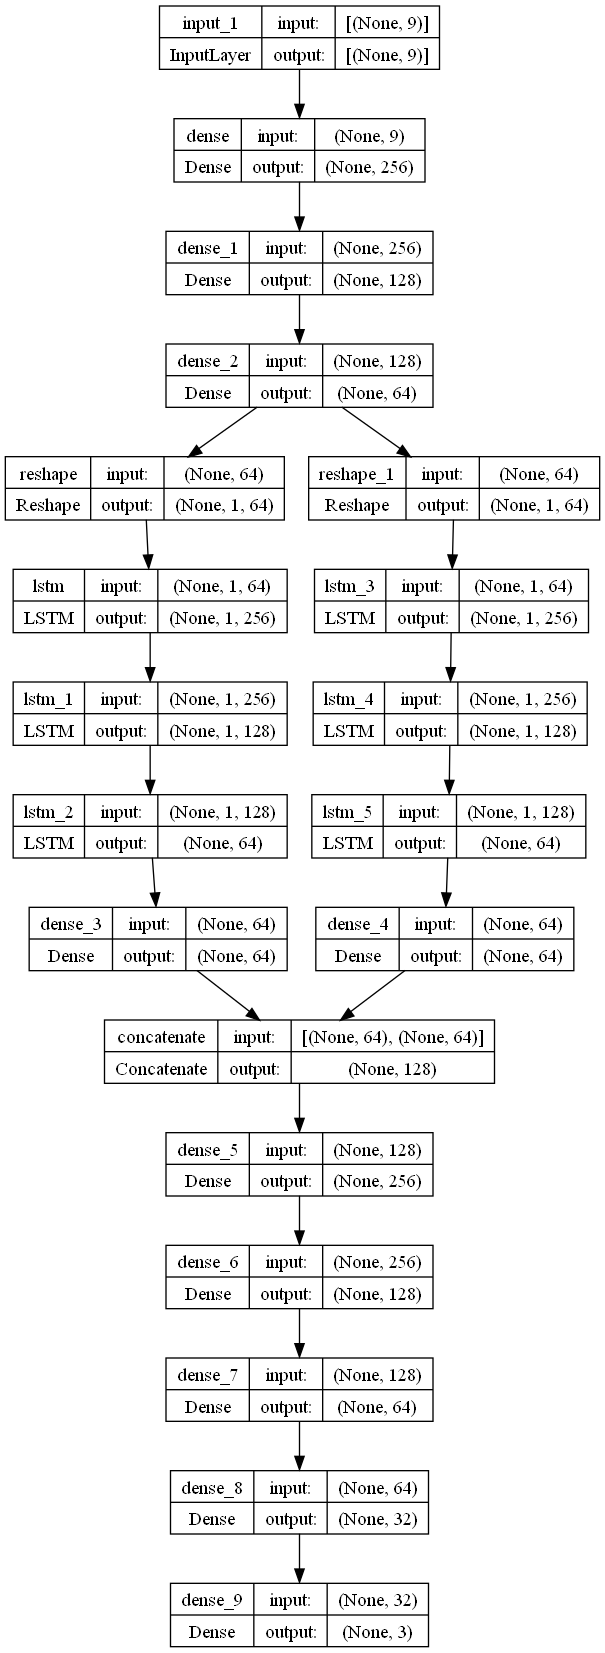

In [14]:
# describing and visualizing the model
final_model.summary()
tf.keras.utils.plot_model(final_model, to_file='model.png', show_shapes=True)

In [ ]:
# describing and visualizing the model
model.summary()
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

In [15]:
import time
for i in tqdm(range(100)):
    time.sleep(0.001)
    

100%|██████████| 100/100 [00:01<00:00, 74.54it/s]


In [ ]:
from tqdm import tqdm

history_n = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
                      epochs=100, batch_size=64, 
                      callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=99)])

In [16]:
history = final_model.fit(x_train, y_train, validation_data=(x_test, y_test),
                    epochs=25, verbose=1, batch_size=256,)


Epoch 1/25
37/37 [==============================] - 20s 131ms/step - loss: 0.4848 - accuracy: 0.6998 - val_loss: 0.2253 - val_accuracy: 0.8340
Epoch 2/25
37/37 [==============================] - 1s 32ms/step - loss: 0.1619 - accuracy: 0.8796 - val_loss: 0.1123 - val_accuracy: 0.8752
Epoch 3/25
37/37 [==============================] - 1s 31ms/step - loss: 0.0672 - accuracy: 0.9134 - val_loss: 0.0399 - val_accuracy: 0.9278
Epoch 4/25
37/37 [==============================] - 1s 31ms/step - loss: 0.0266 - accuracy: 0.9361 - val_loss: 0.0274 - val_accuracy: 0.9176
Epoch 5/25
37/37 [==============================] - 1s 31ms/step - loss: 0.0189 - accuracy: 0.9479 - val_loss: 0.0218 - val_accuracy: 0.9490
Epoch 6/25
37/37 [==============================] - 1s 32ms/step - loss: 0.0153 - accuracy: 0.9549 - val_loss: 0.0150 - val_accuracy: 0.9431
Epoch 7/25
37/37 [==============================] - 1s 31ms/step - loss: 0.0125 - accuracy: 0.9548 - val_loss: 0.0117 - val_accuracy: 0.9507
Epoch 8/25


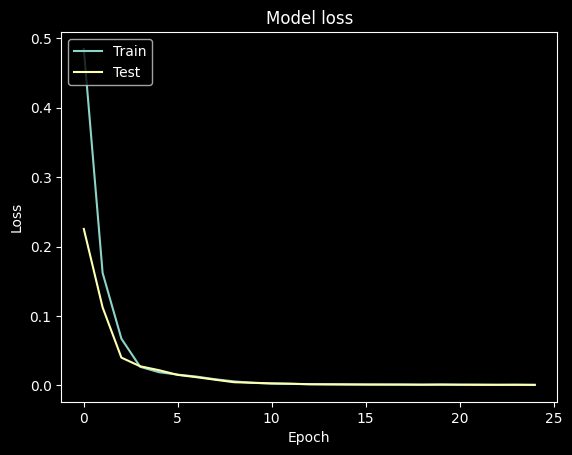

In [17]:
# plotting the loss and accuracy of the model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# plotting the loss and accuracy of the model
plt.plot(history_n.history['loss'])
plt.plot(history_n.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [18]:
# evaluating the model
final_model.evaluate(x_test, y_test)

74/74 [==============================] - 1s 13ms/step - loss: 5.2409e-04 - accuracy: 0.9898


[0.0005240869359113276, 0.9898089170455933]

In [ ]:
model.evaluate(x_test, y_test)

In [19]:
# predictons of the model
predictions = final_model.predict(x_test)

74/74 [==============================] - 4s 11ms/step


In [ ]:
predictions_n = model.predict(x_test)

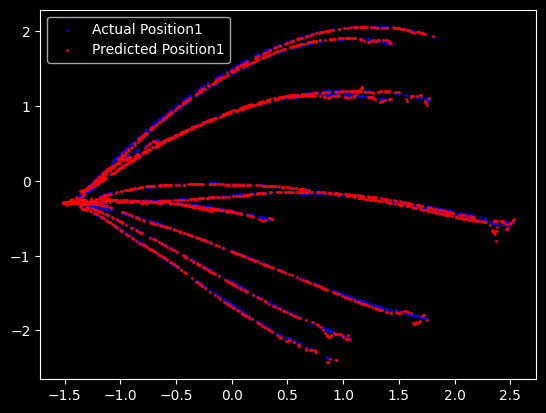

In [20]:
# plotting the predictions with the actual values, scatter plot using the time as a sudo place holder
time = np.arange(0, len(predictions))
plt.scatter(x_test['Time'], y_test['Position1'], label='Actual Position1', s=1, c='b')
plt.scatter(x_test['Time'], predictions[:,0], label='Predicted Position1', s= 1, c='r')
plt.legend()

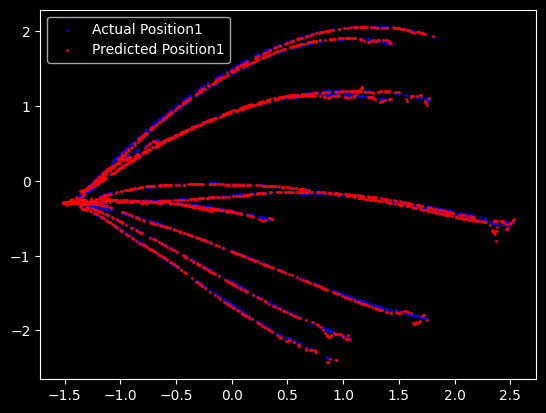

In [21]:
# plotting the predictions with the actual values, scatter plot using the time as a sudo place holder
time = np.arange(0, len(predictions))
plt.scatter(x_test['Time'], y_test['Position1'], label='Actual Position1', s=1, c='b')
plt.scatter(x_test['Time'], predictions[:,0], label='Predicted Position1', s= 1, c='r')
plt.legend()

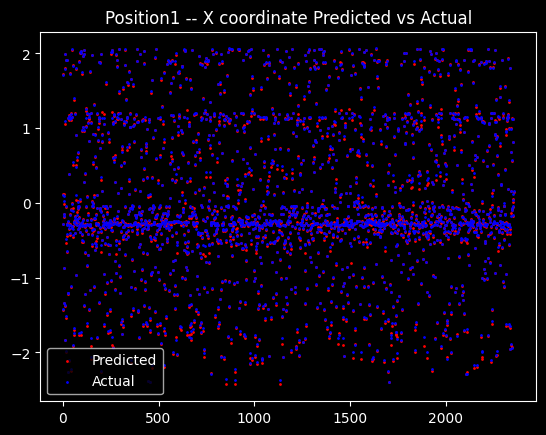

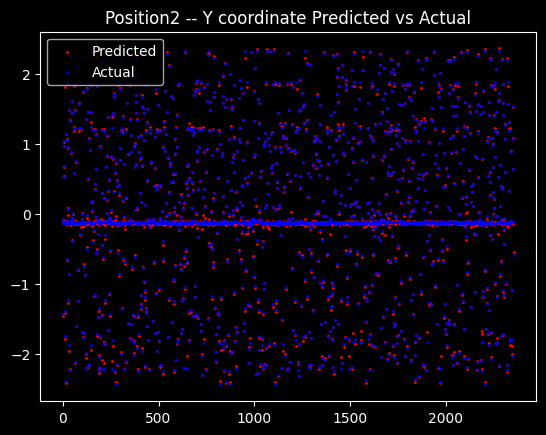

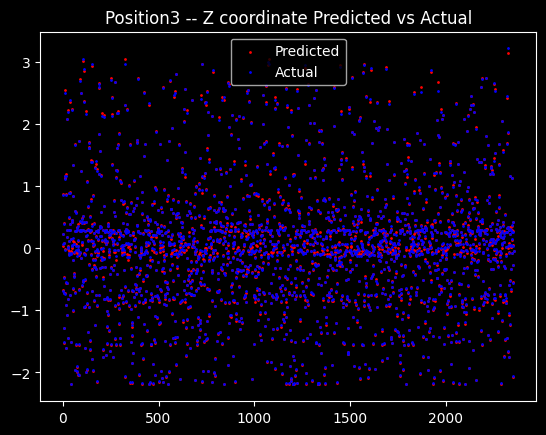

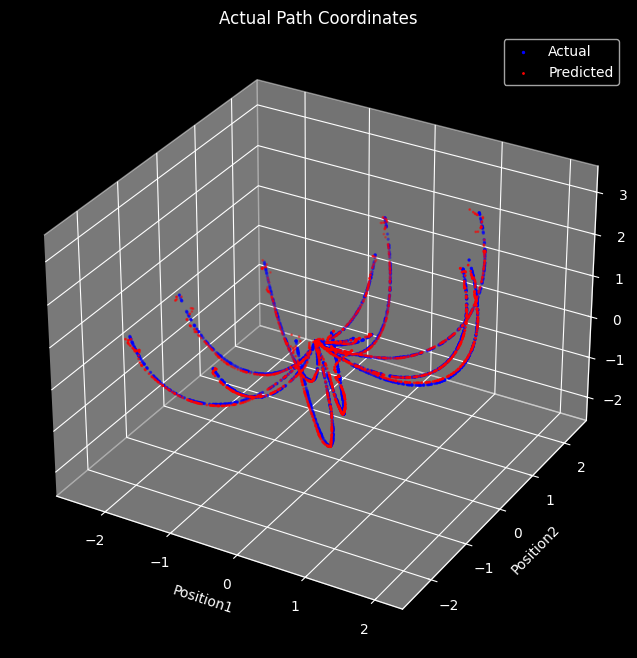

In [22]:
time = np.arange(0, predictions[:,0].shape[0]).reshape(-1, 1)
plt.scatter(time, predictions[:,0], s=1, label='Predicted', color='red')
plt.scatter(time, y_test.to_numpy()[:,0], s=1, label='Actual', color='blue')
plt.title(f"Position1 -- X coordinate Predicted vs Actual")
plt.legend()
plt.show()

time = np.arange(0, predictions[:,0].shape[0]).reshape(-1, 1)
plt.scatter(time, predictions[:,1], s=1, label='Predicted', color='red')
plt.scatter(time, y_test.to_numpy()[:,1], s=1, label='Actual', color='blue')
plt.title(f"Position2 -- Y coordinate Predicted vs Actual")
plt.legend()
plt.show()

time = np.arange(0, predictions[:,0].shape[0]).reshape(-1, 1)
plt.scatter(time, predictions[:,2], s=1, label='Predicted', color='red')
plt.scatter(time, y_test.to_numpy()[:,2], s=1, label='Actual', color='blue')
plt.title(f"Position3 -- Z coordinate Predicted vs Actual")
plt.legend()

fig = plt.figure(dpi=100, figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(y_test['Position1'], y_test['Position2'], y_test['Position3'], s=2, color='b', label='Actual')
ax.set_xlabel('Position1')
ax.set_ylabel('Position2')
ax.set_zlabel('Position3')
plt.title("Actual Path Coordinates")

# ax = fig.add_subplot(111, projection='3d')
ax.scatter(predictions[:,0], predictions[:,1], predictions[:,2], s=1, color='r', label='Predicted')
ax.set_xlabel('Position1')
ax.set_ylabel('Position2')
ax.set_zlabel('Position3')
plt.title("Actual Path Coordinates")
plt.legend()

plt.show()

In [24]:
# saving model 
final_model.save(f'{model_name}.h5')

In [ ]:
model.save(f'{model_name}.h5')